#Trabalho de Mineração de dados e Machine Learning


## Importando bibliotecas

In [ ]:
!pip install category_encoders

In [ ]:
# Descomente essa parte caso queira usar a biblioteca de comparação de modelo 
#!pip install pycaret
#from pycaret.classification import *

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import math
from scipy import stats


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
from sklearn import tree
import graphviz 

from sklearn.metrics import classification_report
from imblearn.over_sampling  import RandomOverSampler 
from imblearn.under_sampling  import RandomUnderSampler 
from sklearn.model_selection import cross_val_score


import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pd.set_option('max_columns', None)

## Importação dos dados

In [ ]:
dados_original = pd.read_csv('classificacao_binaria_train.csv',sep=';',encoding='utf-8')

FileNotFoundError: ignored

In [ ]:
# Substituindo o item Parcialmente autorizado por Autorizado
dados_original['DS_STATUS_ITEM'] = dados_original['DS_STATUS_ITEM'].replace('Parcialmente autorizado','Autorizado')

## Visão geral dos dados
aqui olhamos os tipos dos dados, quantidade de atributos e registros e verificamos a quantidade dos dados nulos.

In [ ]:
dados_original.sample(2)

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_TIPO_CONSULTA,QT_TEMPO_DOENCA,DS_UNIDADE_TEMPO_DOENCA,DS_TIPO_DOENCA,DS_INDICACAO_ACIDENTE,DS_TIPO_SAIDA,DS_TIPO_INTERNACAO,DS_REGIME_INTERNACAO,DS_CARATER_ATENDIMENTO,DS_TIPO_ACOMODACAO,QT_DIA_SOLICITADO,CD_GUIA_REFERENCIA,DS_TIPO_ATENDIMENTO,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM
385710,872205,2115147,2459236,Guia de solicitac?o SP/SADT,2434010.0,1,CLINICA DE IMAGEM,Medico ortopedista e traumatologista,NaN,NaN,NaN,NaN,N?o acidente,NaN,NaN,NaN,Eletiva,NaN,NaN,NaN,Exames,Z10,SEGUE ANEXO,Procedimentos,41101227,RM - RESSONANCIA MAGNETICA - COLUNA CERVICAL O...,RESSONANCIA MAGNETICA DIAGNOSTICA,RESSONANCIA MAGNETICA,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1,Autorizado
124822,1392451,3816798,2459508,Guia de solicitac?o SP/SADT,2441741.0,1,CLINICA,Medico ortopedista e traumatologista,NaN,NaN,NaN,NaN,Outros,NaN,NaN,NaN,Eletiva,NaN,NaN,NaN,Terapias,NaN,fisioterapia ombro,Procedimentos,20103484,PATOLOGIA OSTEOMIOARTICULAR EM UM MEMBRO,REABILITAC?ES - SESS?ES,PROCEDIMENTOS CLINICOS AMBULATORIAIS,PROCED. CLINICOS,10,Negado


In [ ]:
#Quantidade de linhas e colunas
dados_original.shape

(412540, 31)

In [ ]:
# Verificando os tipos dos dados
dados_original.dtypes

NR_SEQ_REQUISICAO              int64
NR_SEQ_ITEM                    int64
DT_REQUISICAO                  int64
DS_TIPO_GUIA                  object
DT_NASCIMENTO                float64
NR_PRODUTO                     int64
DS_TIPO_PREST_SOLICITANTE     object
DS_CBO                        object
DS_TIPO_CONSULTA              object
QT_TEMPO_DOENCA              float64
DS_UNIDADE_TEMPO_DOENCA       object
DS_TIPO_DOENCA                object
DS_INDICACAO_ACIDENTE         object
DS_TIPO_SAIDA                float64
DS_TIPO_INTERNACAO            object
DS_REGIME_INTERNACAO          object
DS_CARATER_ATENDIMENTO        object
DS_TIPO_ACOMODACAO            object
QT_DIA_SOLICITADO            float64
CD_GUIA_REFERENCIA           float64
DS_TIPO_ATENDIMENTO           object
CD_CID                        object
DS_INDICACAO_CLINICA          object
DS_TIPO_ITEM                  object
CD_ITEM                        int64
DS_ITEM                       object
DS_CLASSE                     object
D

In [ ]:
#Verificando a quantidade de nulos em cada atributo
dados_original.isnull().sum()

NR_SEQ_REQUISICAO                 0
NR_SEQ_ITEM                       0
DT_REQUISICAO                     0
DS_TIPO_GUIA                      0
DT_NASCIMENTO                    11
NR_PRODUTO                        0
DS_TIPO_PREST_SOLICITANTE         0
DS_CBO                            0
DS_TIPO_CONSULTA             396851
QT_TEMPO_DOENCA              412259
DS_UNIDADE_TEMPO_DOENCA      412258
DS_TIPO_DOENCA               411573
DS_INDICACAO_ACIDENTE         32050
DS_TIPO_SAIDA                412540
DS_TIPO_INTERNACAO           290612
DS_REGIME_INTERNACAO         290611
DS_CARATER_ATENDIMENTO            0
DS_TIPO_ACOMODACAO           290686
QT_DIA_SOLICITADO            291855
CD_GUIA_REFERENCIA           342242
DS_TIPO_ATENDIMENTO          121289
CD_CID                       235017
DS_INDICACAO_CLINICA          87470
DS_TIPO_ITEM                      0
CD_ITEM                           0
DS_ITEM                           0
DS_CLASSE                         0
DS_SUBGRUPO                 

## Limpeza de dados
Eliminando dados faltantes ,duplicados e irrelevantes para o problema

In [ ]:
#Após uma analise da descrição dos dados, esses atributos seram dropados por não agregar no target
dados_original = dados_original.drop([	'NR_SEQ_ITEM','NR_PRODUTO','DS_TIPO_SAIDA'],axis='columns') 

### Eliminando atributos com muito dados nulos


---


Aqui eliminamos os atributos que possui mais que x% dos dados faltando(null)

In [ ]:
dados = dados_original

limiar_exclusao = 0.2 
limiar = int(dados.shape[0] * (limiar_exclusao)) # calcula o limiar em função da quantidade de objetos do df
dados = dados.dropna(axis='columns', how='any', thresh=limiar) 

print(dados_original.shape) # quantidade atual da dimenção

(412540, 28)


In [ ]:
# lista de atributos que foram eliminadas na etapa anterior
print( set(dados_original.columns.tolist()) -  set(dados.columns.tolist()))

{'DS_TIPO_CONSULTA', 'DS_UNIDADE_TEMPO_DOENCA', 'CD_GUIA_REFERENCIA', 'QT_TEMPO_DOENCA', 'DS_TIPO_DOENCA'}



---

Ainda existem muito dados nullos, sua eliminação ou tratamento será decidido posteriormente após analises

### Elimento duplicados e inconsistentes
---

Registros duplicados

In [ ]:
# numero de registros duplicados
atributos_de_feature = dados.columns
atributos_de_feature = atributos_de_feature.drop(labels=['NR_SEQ_REQUISICAO']) # NR_SEQ_REQUISICAO irei usar como chave primaria para possiveis junções
dados[dados.duplicated(subset= atributos_de_feature  ,keep=False)].shape[0] 

4194

In [ ]:
#eliminando os duplicados
dados = dados.drop_duplicates(subset = atributos_de_feature ,keep='last') 
dados.shape

(410130, 23)

Registros inconsistente

In [ ]:
#eliminando registros inconsistentes com o target (todas os atributos iguais com o resultado diferente)
atributos_entrada = dados.columns
atributos_entrada = atributos_entrada.drop(labels=['NR_SEQ_REQUISICAO','DS_STATUS_ITEM'])

# numero de registros inconsistentes com o target
print(dados[ dados.duplicated(subset=atributos_entrada, keep=False)  ].shape[0])

1634


In [ ]:
dados = dados.drop_duplicates(subset=atributos_entrada, keep=False)

#dimenção atual do dataframe
print(dados.shape) 

(408496, 23)


In [ ]:
#Após mais uma analise, esses atributos seram dropados por possuirem muitos valores unicos e não ter como trata-los no momento
dados = dados.drop(['DS_CBO','DS_INDICACAO_CLINICA','DS_ITEM'],axis='columns') 
print(dados.shape)

(408496, 20)


## Analise estatistico
Explorando dados para conhecer e descobrir possiveis padrões

#### Analisaremos os atributos com suas propiedades estatisticas

In [ ]:
#descrição atuais dos dados categoricos
dados.select_dtypes(include='object').describe()

,DS_TIPO_GUIA,DS_TIPO_PREST_SOLICITANTE,DS_INDICACAO_ACIDENTE,DS_TIPO_INTERNACAO,DS_REGIME_INTERNACAO,DS_CARATER_ATENDIMENTO,DS_TIPO_ACOMODACAO,DS_TIPO_ATENDIMENTO,CD_CID,DS_TIPO_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,DS_STATUS_ITEM
count,408496,408496,376664,120930,120931,408496,120856,288205,175938,408496,408496,408496,408496,408496
unique,3,12,4,6,3,2,8,13,1901,2,501,74,9,2
top,Guia de solicitac?o SP/SADT,CLINICA,N?o acidente,Clinica,Hospitalar,Eletiva,Enfermaria,Exames,Z00,Procedimentos,PROCEDIMENTOS,MEDICINA LABORATORIAL,PROCED. DIAGNOSTICOS E TERAPEUTICOS,Autorizado
freq,287545,161180,315870,57923,114515,284580,81603,187989,15298,331819,43287,60914,194757,283098


In [ ]:
dados[['QT_DIA_SOLICITADO','QT_SOLICITADA']].describe()

,QT_DIA_SOLICITADO,QT_SOLICITADA
count,119723.000000,408496.000000
mean,2.450640,58.715229
std,3.669241,4072.483203
min,0.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,3.000000,2.000000
max,55.000000,600343.000000


Autorizado    283098
Negado        125398
Name: DS_STATUS_ITEM, dtype: int64


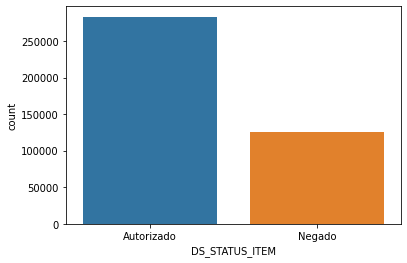

In [ ]:
#Verificando a quantidade de itens do atributo target
print(dados['DS_STATUS_ITEM'].value_counts())
sns.countplot(x="DS_STATUS_ITEM", data=dados)
plt.show()

#### Analises para atributos numericos

[None]

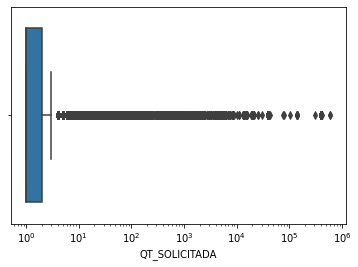

In [ ]:
#verificando a quantidade de itens solicitados (em escala de log) 
g = sns.boxplot(x="QT_SOLICITADA", data=dados)
g.set(xscale="log")

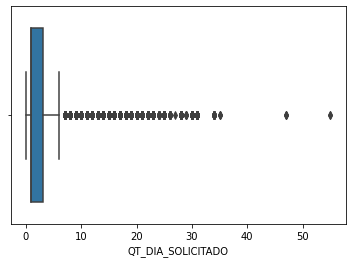

In [ ]:
#verificando a quantidade de dias solicitados (em casos de solicitação de internação)
sns.boxplot(x="QT_DIA_SOLICITADO", data=dados)
plt.show()

#### Analise da relação do target (DS_STATUS_ITEM) com alguns atributos
---
Explorando como o target se comporta combinado com alguns atributos 

##### Analise com o atributo QT_SOLICITADA (itens)

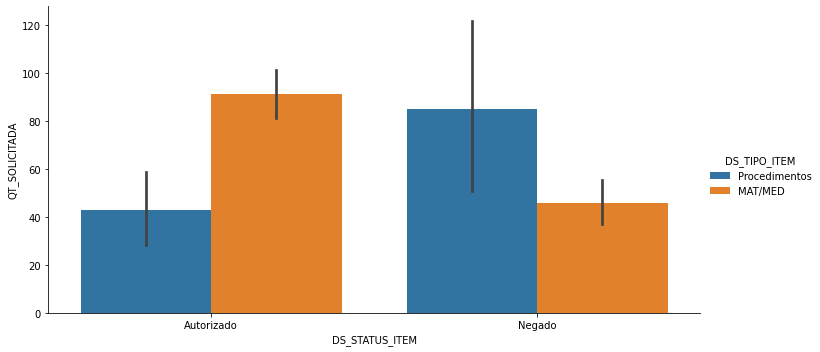

In [ ]:
#verificando a quantidade de solicitações de itens por tipo do item em relação aos autorizados ou negados
sns.catplot(x="DS_STATUS_ITEM", y="QT_SOLICITADA", hue="DS_TIPO_ITEM", kind="bar",
            height=5, aspect=2 ,data=dados)


Guia de solicitac?o SP/SADT                         287545
Guia de solicitac?o internac?o                       61656
Guia de solicitac?o de prorrogac?o de internac?o     59295
Name: DS_TIPO_GUIA, dtype: int64


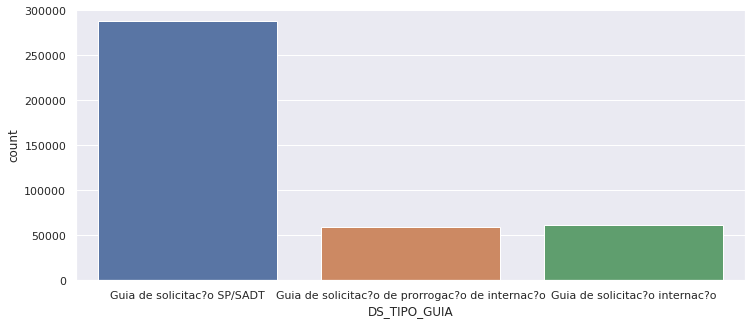

In [ ]:
#Contando a quantiade por cada guia de solicitação
print(dados['DS_TIPO_GUIA'].value_counts())
sns.set(rc = {'figure.figsize':(12,5)})
sns.countplot(x="DS_TIPO_GUIA", data=dados)

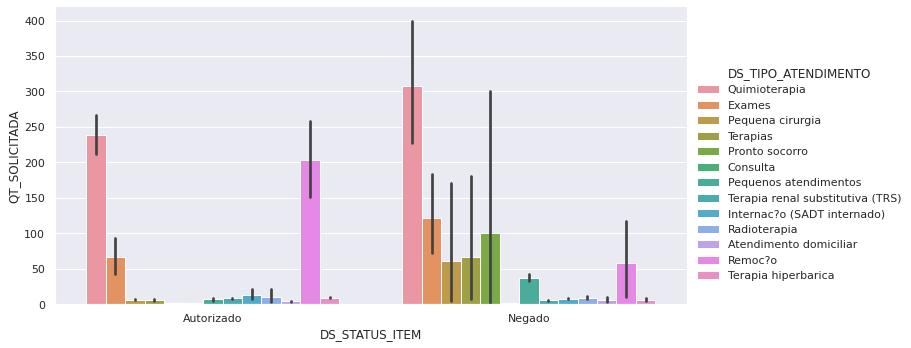

In [ ]:
#verificando a quantidade de solicitações de itens por tipo de atendimento em relação aos autorizados ou negados
sns.catplot(x="DS_STATUS_ITEM", y="QT_SOLICITADA", hue="DS_TIPO_ATENDIMENTO", kind="bar", height=5, aspect=2 ,data=dados)

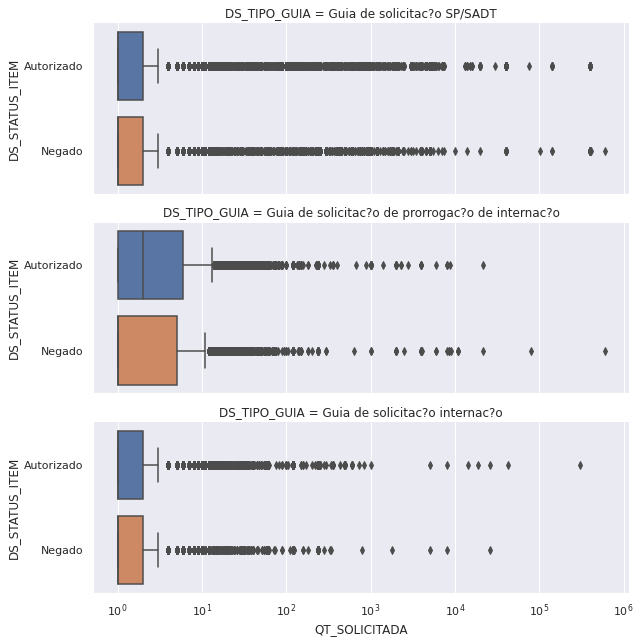

In [ ]:
# analisando em escala log a quantidade de itens solicitado(QT_SOLICITADA), divido entre os tipo de solicitações(DS_TIPO_GUIA)
g = sns.catplot(x="QT_SOLICITADA", y="DS_STATUS_ITEM", row="DS_TIPO_GUIA",
                kind="box", orient="h", height=3, aspect=3,
                data=dados)
g.set(xscale="log")

Analisando os mesmos itens anterior, agora filtrando para 95% dos itens

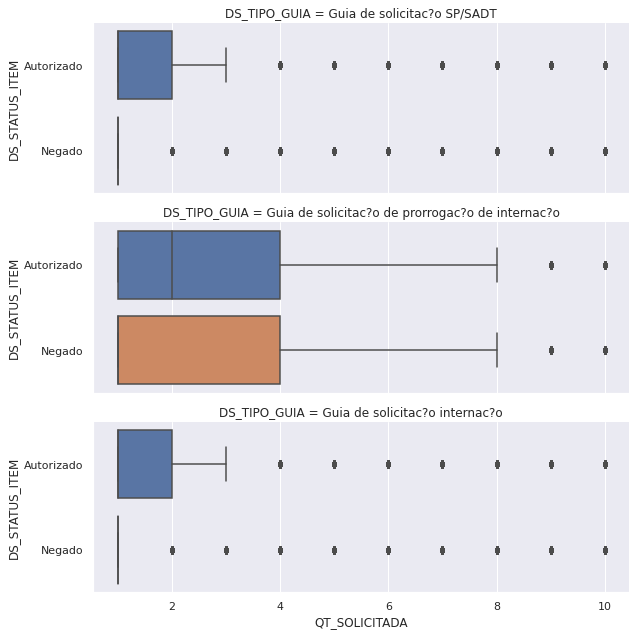

In [ ]:
# analisando limitando a quantidade de itens solicitado por uma faixa do percentil

# calculando o percitil x da QT_SOLICITADA
percentil = stats.scoreatpercentile(dados['QT_SOLICITADA'], 95)

g = sns.catplot(x="QT_SOLICITADA", y="DS_STATUS_ITEM", row="DS_TIPO_GUIA",
                kind="box", orient="h", height=3, aspect=3,
                data=dados[dados['QT_SOLICITADA']<= percentil])

##### Analise com o atributo QT_DIA_SOLICITADO (internações)

Eletiva                284580
Urgencia/Emergencia    123916
Name: DS_CARATER_ATENDIMENTO, dtype: int64


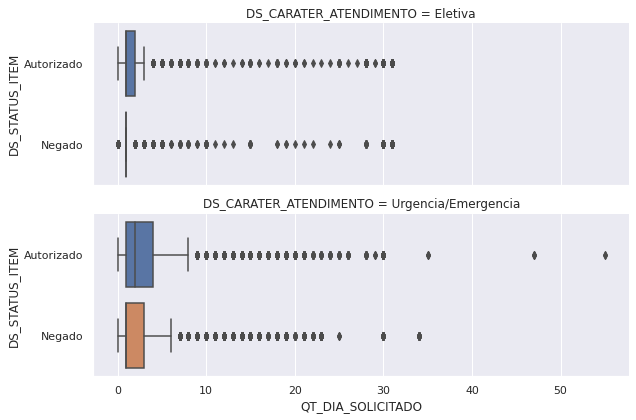

In [ ]:
# analisando a quantidade de dias solicitado(QT_DIA_SOLICITADO), separado entre os tipo de atendimento(DS_CARATER_ATENDIMENTO)
g = sns.catplot(x="QT_DIA_SOLICITADO", y="DS_STATUS_ITEM", row="DS_CARATER_ATENDIMENTO",
                kind="box", orient="h", height=3, aspect=3,
                data=dados) 
print(dados['DS_CARATER_ATENDIMENTO'].value_counts() )

Exames                              187989
Pequena cirurgia                     45121
Quimioterapia                        19844
Pequenos atendimentos                12605
Pronto socorro                        9239
Terapias                              6433
Internac?o (SADT internado)           3324
Terapia renal substitutiva (TRS)      1297
Consulta                              1195
Atendimento domiciliar                 490
Radioterapia                           368
Remoc?o                                206
Terapia hiperbarica                     94
Name: DS_TIPO_ATENDIMENTO, dtype: int64


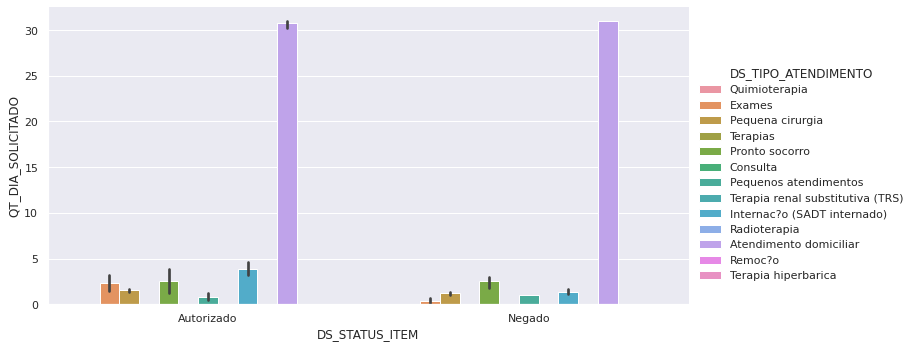

In [ ]:
#Verificando a quantidade de solicitações de internações do DS_TIPO_ATENDIMENTO entre os atributos DS_STATUS_ITEM
sns.catplot(x="DS_STATUS_ITEM", y="QT_DIA_SOLICITADO", hue="DS_TIPO_ATENDIMENTO", kind="bar", height=5, aspect=2 ,data=dados)
print(dados['DS_TIPO_ATENDIMENTO'].value_counts() )

Procedimentos    331819
MAT/MED           76677
Name: DS_TIPO_ITEM, dtype: int64


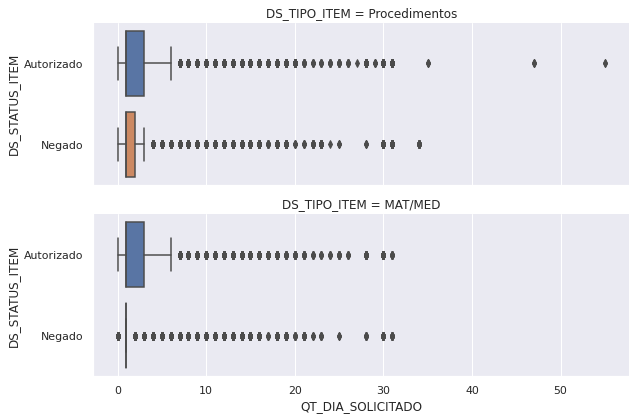

In [ ]:
#verificando a distribuição de autoricações ou rejeições entre DS_TIPO_ITEM e QT_DIA_SOLICITADO
g = sns.catplot(x="QT_DIA_SOLICITADO", y="DS_STATUS_ITEM", row="DS_TIPO_ITEM",
                kind="box", orient="h", height=3, aspect=3,
                data=dados)
print(dados['DS_TIPO_ITEM'].value_counts() )

##### Verificando a contagem de itens em relação ao target

Guia de solicitac?o SP/SADT                         0.703911
Guia de solicitac?o internac?o                      0.150934
Guia de solicitac?o de prorrogac?o de internac?o    0.145154
Name: DS_TIPO_GUIA, dtype: float64

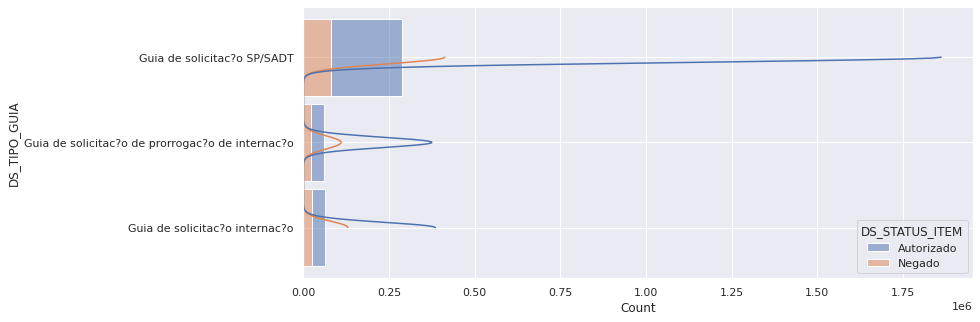

In [ ]:
#visualização da distribuição de valores do atributo 'DS_TIPO_GUIA'
DS_TIPO_GUIA_hist = sns.histplot(data=dados,y='DS_TIPO_GUIA',hue='DS_STATUS_ITEM', multiple='stack', kde=True, shrink=.9)
DS_TIPO_GUIA_hist
dados['DS_TIPO_GUIA'].value_counts(normalize=True)

CLINICA                  0.394569
HOSPITAL                 0.374523
LABORATORIO              0.100172
CLINICA DE IMAGEM        0.050710
PRESTADOR DE SERVICOS    0.035190
MEDICO                   0.016482
UTI                      0.015119
CLINICA  DE UROLOGIA     0.009332
HOME CARE                0.001958
CLINICA DE RADIOLOGIA    0.000969
INTERCAMBIO              0.000624
COOPERATIVA              0.000350
Name: DS_TIPO_PREST_SOLICITANTE, dtype: float64

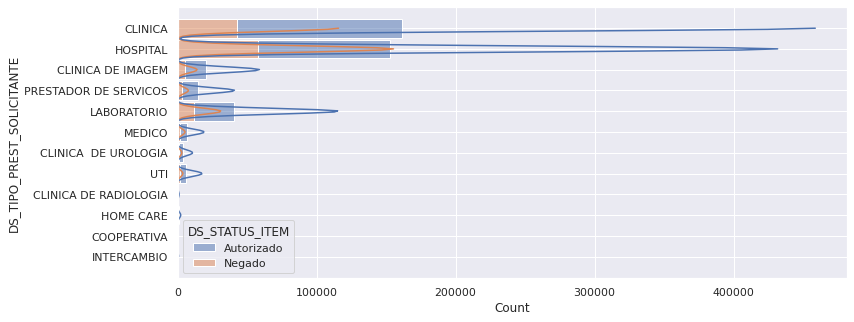

In [ ]:
#visualização da frequencia de atributos da classe 'DS_TIPO_PREST_SOLICITANTE'
sns.histplot(dados,y='DS_TIPO_PREST_SOLICITANTE',hue='DS_STATUS_ITEM', multiple='stack', kde=True, shrink=.9)
dados['DS_TIPO_PREST_SOLICITANTE'].value_counts(normalize=True)

N?o acidente    0.838599
Outros          0.158937
Trabalho        0.001959
Transito        0.000504
Name: DS_INDICACAO_ACIDENTE, dtype: float64

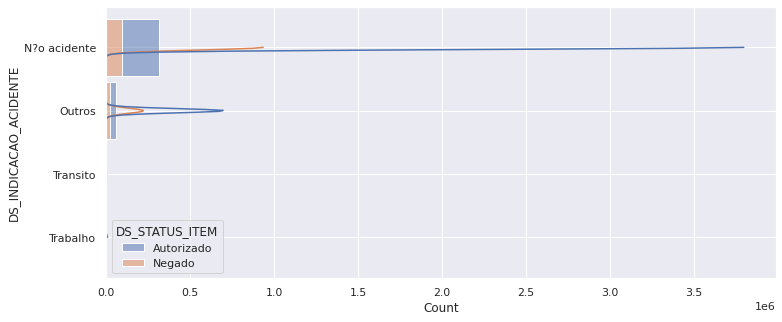

In [ ]:
#verificando a distribuição de valores de atributos da classe 'DS_INDICACAO_ACIDENTE' 
sns.histplot(dados,y='DS_INDICACAO_ACIDENTE',hue='DS_STATUS_ITEM', multiple='stack', shrink=.9, kde=True)
dados['DS_INDICACAO_ACIDENTE'].value_counts(normalize=True)

Clinica         0.478980
Cirurgica       0.473580
Pediatrica      0.021012
Obstetrica      0.014876
Hemodinamica    0.010973
Psiquiatrica    0.000579
Name: DS_TIPO_INTERNACAO, dtype: float64

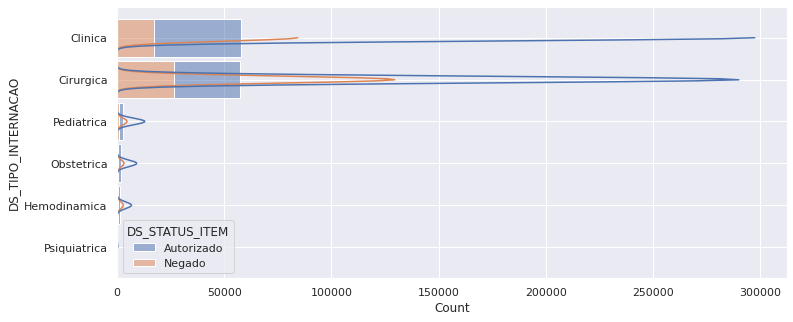

In [ ]:
#verificando a distribuição de valores de atributos da classe 'DS_TIPO_INTERNACAO'
sns.histplot(dados,y='DS_TIPO_INTERNACAO',hue='DS_STATUS_ITEM', multiple='stack', shrink=.9, kde=True)
dados['DS_TIPO_INTERNACAO'].value_counts(normalize=True)

Hospitalar      0.946945
Hospital-dia    0.047912
Domiciliar      0.005143
Name: DS_REGIME_INTERNACAO, dtype: float64

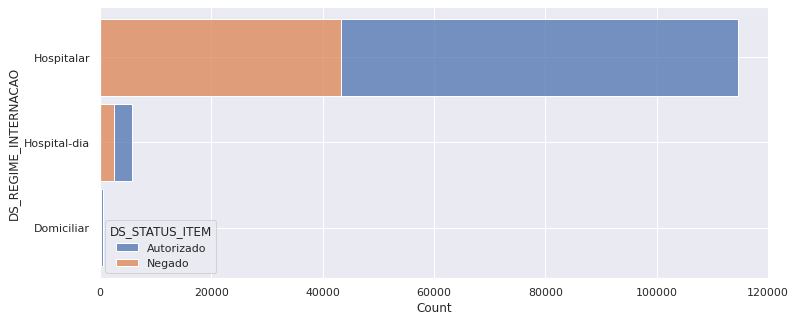

In [ ]:
#verificando a distribuição de valores de atributos da classe 'DS_REGIME_INTERNACAO'
sns.histplot(dados,y='DS_REGIME_INTERNACAO',hue='DS_STATUS_ITEM', multiple='stack', shrink=.9)
dados['DS_REGIME_INTERNACAO'].value_counts(normalize=True)

Eletiva                284580
Urgencia/Emergencia    123916
Name: DS_CARATER_ATENDIMENTO, dtype: int64

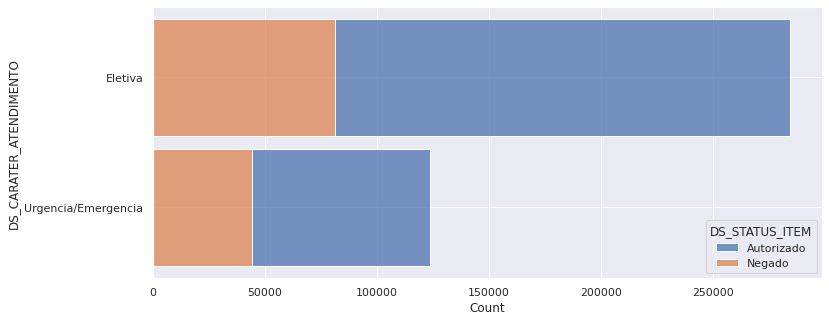

In [ ]:
#verificando a distribuição de valores de atributos da classe 'DS_CARATER_ATENDIMENTO'
sns.histplot(dados,y='DS_CARATER_ATENDIMENTO',hue='DS_STATUS_ITEM', multiple='stack', shrink=.9)
dados['DS_CARATER_ATENDIMENTO'].value_counts()

## Classificação
Aqui fazemos alguns testes em tratamentos de nulos e classificadores

#### Tratando alguns dados

In [ ]:
dados_teste = dados

In [ ]:
dados_teste.shape

(408496, 20)

In [ ]:
#Tratando dados

# Vimos que a maioria dos dados nulos para essa categoria vem do tipo de atendimento EXAMES, logo não necessita de internação
dados_teste['QT_DIA_SOLICITADO'].fillna(0, inplace=True)

#Alterando a ordem de DT_NASCIMENTO para os que são mais melhos terem mais peso
dados_teste['DT_NASCIMENTO'] = dados_teste['DT_NASCIMENTO'].apply(lambda x : -x)

# Vimos que a maioria dos dados nulos para essa categoria vem do tipo de atendimento Guia de solicitacao SP/SADT, logo não necessita de internação, assim criamos uma nova categoria para isso.
for feature in ['DS_TIPO_INTERNACAO','DS_TIPO_ACOMODACAO','DS_REGIME_INTERNACAO']:
  dados_teste[feature].fillna('Nao_Internado', inplace=True)

# Vimos que todos os nulos de DS_TIPO_ATENDIMENTO são de iternação
dados_teste['DS_TIPO_ATENDIMENTO'].fillna('Internacao', inplace=True)  

#Substituindo os nulo pelo item de DS_INDICACAO_ACIDENTE que representa 82% dos dados não nulos
dados_teste['DS_INDICACAO_ACIDENTE'].fillna('N?o acidente', inplace=True)  

#Dropando registros nulos de DT_NASCIMENTO
dados_teste = dados_teste.dropna(subset=['DT_NASCIMENTO'])

#binarizando o target
dados_teste['DS_STATUS_ITEM'] = dados_teste['DS_STATUS_ITEM'].map({'Autorizado':0, 'Negado':1}) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#Dados atualizado
dados_teste.sample(1)

,NR_SEQ_REQUISICAO,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,DS_TIPO_PREST_SOLICITANTE,DS_INDICACAO_ACIDENTE,DS_TIPO_INTERNACAO,DS_REGIME_INTERNACAO,DS_CARATER_ATENDIMENTO,DS_TIPO_ACOMODACAO,QT_DIA_SOLICITADO,DS_TIPO_ATENDIMENTO,CD_CID,DS_TIPO_ITEM,CD_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM
372765,819827,2459202,Guia de solicitac?o internac?o,-2441085.0,HOSPITAL,Outros,Cirurgica,Hospitalar,Eletiva,Enfermaria,1.0,Internacao,N201,Procedimentos,31102077,URETER,SISTEMA URINARIO,PROCED. CIRURGICOS E INVASIVOS,1,1


#### Encoding features

In [ ]:
# Dropando features que não usaremos no modelo final
dados_teste = dados_teste.drop(['DS_TIPO_PREST_SOLICITANTE','DS_TIPO_INTERNACAO','QT_SOLICITADA','DS_TIPO_PREST_SOLICITANTE','DS_INDICACAO_ACIDENTE','DS_REGIME_INTERNACAO', 'DS_TIPO_ACOMODACAO','DS_TIPO_ITEM','DS_TIPO_GUIA','DS_CARATER_ATENDIMENTO','QT_DIA_SOLICITADO','DS_CARATER_ATENDIMENTO','DS_GRUPO'],axis='columns')


In [ ]:
# Features que usaremos no modelo final
dados_teste.columns

Index(['NR_SEQ_REQUISICAO', 'DT_REQUISICAO', 'DT_NASCIMENTO',
       'DS_TIPO_ATENDIMENTO', 'CD_CID', 'CD_ITEM', 'DS_CLASSE', 'DS_SUBGRUPO',
       'DS_STATUS_ITEM'],
      dtype='object')

Encoding features usando o método Weight of Evidence

In [ ]:
train_targets = dados_teste['DS_STATUS_ITEM']
train_features = dados_teste.drop(['DS_STATUS_ITEM'], axis=1)

#columns = [col for col in train_features.columns if col != 'NR_SEQ_REQUISICAO']
columns = [col for col in train_features.columns]
woe_encoder = ce.WOEEncoder(cols=columns)
woe_encoded_train = woe_encoder.fit_transform(train_features[columns], train_targets).add_suffix('_woe')
train_features = train_features.join(woe_encoded_train)
train_features = train_features.join(train_targets)

In [ ]:
train_features.columns

Index(['NR_SEQ_REQUISICAO', 'DT_REQUISICAO', 'DT_NASCIMENTO',
       'DS_TIPO_ATENDIMENTO', 'CD_CID', 'CD_ITEM', 'DS_CLASSE', 'DS_SUBGRUPO',
       'NR_SEQ_REQUISICAO_woe', 'DT_REQUISICAO_woe', 'DT_NASCIMENTO_woe',
       'DS_TIPO_ATENDIMENTO_woe', 'CD_CID_woe', 'CD_ITEM_woe', 'DS_CLASSE_woe',
       'DS_SUBGRUPO_woe', 'DS_STATUS_ITEM'],
      dtype='object')

In [ ]:
#Escolhendo apenas as colunas transformadas
data_enconding=train_features[['NR_SEQ_REQUISICAO_woe', 'DT_REQUISICAO_woe', 'DT_NASCIMENTO_woe',
       'DS_TIPO_ATENDIMENTO_woe', 'CD_CID_woe', 'CD_ITEM_woe', 'DS_CLASSE_woe',
       'DS_SUBGRUPO_woe', 'DS_STATUS_ITEM']]

In [ ]:
data_numeric = data_enconding 
#Dimenção final
data_numeric.shape

(408485, 9)

In [ ]:
data_numeric.sample(2)

,NR_SEQ_REQUISICAO_woe,DT_REQUISICAO_woe,DT_NASCIMENTO_woe,DS_TIPO_ATENDIMENTO_woe,CD_CID_woe,CD_ITEM_woe,DS_CLASSE_woe,DS_SUBGRUPO_woe,DS_STATUS_ITEM
10699,0.000000,-0.127379,-1.750674,0.560294,0.077612,-1.144253,-0.100772,-0.100772,0
52975,2.423714,-0.287810,0.477803,-0.319305,-0.977484,0.814276,0.757255,0.757255,1


#### Modelo de classificação
Aqui balanceamos e separamos os dados para a criação o modelo de classificação


In [ ]:
#Balanceando as classes usando Random Over Sampler

print(data_numeric['DS_STATUS_ITEM'].value_counts()) #atual balanco dos dados 

rus = RandomOverSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(data_numeric.drop(columns=['DS_STATUS_ITEM']), data_numeric['DS_STATUS_ITEM'])
data_numeric = pd.concat([X_resampled, y_resampled], axis='columns')

print(data_numeric['DS_STATUS_ITEM'].value_counts()) #novo balanco dos dados

0    283089
1    125396
Name: DS_STATUS_ITEM, dtype: int64
0    283089
1    283089
Name: DS_STATUS_ITEM, dtype: int64


In [ ]:
# Colunas final
data_numeric.columns

Index(['NR_SEQ_REQUISICAO_woe', 'DT_REQUISICAO_woe', 'DT_NASCIMENTO_woe',
       'DS_TIPO_ATENDIMENTO_woe', 'CD_CID_woe', 'CD_ITEM_woe', 'DS_CLASSE_woe',
       'DS_SUBGRUPO_woe', 'DS_STATUS_ITEM'],
      dtype='object')

In [ ]:
#Dividindo todo o conjunto de dados para ser treinado e ser usado na classificação final do Kaggle
target_cl=data_numeric['DS_STATUS_ITEM']
features_cl=data_numeric[['NR_SEQ_REQUISICAO_woe', 'DT_REQUISICAO_woe', 'DT_NASCIMENTO_woe',
       'DS_TIPO_ATENDIMENTO_woe', 'CD_CID_woe', 'CD_ITEM_woe', 'DS_CLASSE_woe',
       'DS_SUBGRUPO_woe']]

In [ ]:
#Dividindo entre data train e data test para ser usado em testes
X_train, X_test, y_train, y_test = train_test_sfplit(data_numeric.drop(columns=['DS_STATUS_ITEM']), data_numeric['DS_STATUS_ITEM'], test_size=0.2, random_state=123) # 60% para treino e 40% para teste e validação

**RandonForest**

---


Após alguns comparativos entre algoritmos de classificação, o RandonForest foi o escolhido devido ao seu bom desempenho nos testes e sua capacidade de minimizar overfitting

Usando o split para realizar o treino e teste

In [ ]:
# Usando X_train, X_test, y_train, y_test 
classifier_rf_teste = RandomForestClassifier(max_depth=5, min_samples_leaf=1,min_samples_split=2, n_estimators=100,
                       n_jobs=-1, random_state=0, oob_score=True)
classifier_rf_teste.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=0)

In [ ]:
y_pred = classifier_rf_teste.predict(X_test)

print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro')) #f1
print(roc_auc_score(y_test, y_pred)) #roc
print(np.unique(y_pred, return_counts=True))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     56607
           1       0.92      0.86      0.89     56629

    accuracy                           0.89    113236
   macro avg       0.90      0.89      0.89    113236
weighted avg       0.90      0.89      0.89    113236

0.8932994201696498
0.8934328474769048
(array([0, 1]), array([60531, 52705]))


In [ ]:
for i,v in enumerate(classifier_rf_teste.feature_importances_):
	print(X_train.columns[i],': score: %.5f'%v)

NR_SEQ_REQUISICAO_woe : score: 0.69395
DT_REQUISICAO_woe : score: 0.02351
DT_NASCIMENTO_woe : score: 0.17152
DS_TIPO_ATENDIMENTO_woe : score: 0.00380
CD_CID_woe : score: 0.01400
CD_ITEM_woe : score: 0.07565
DS_CLASSE_woe : score: 0.01322
DS_SUBGRUPO_woe : score: 0.00434


Treino final para ser usado no kaggle

In [ ]:
# Usando todo conjunto de dados para ser usado no kaggle
classifier_rf = RandomForestClassifier(max_depth=5, min_samples_leaf=1,min_samples_split=2, n_estimators=100,
                       n_jobs=-1, random_state=0, oob_score=True)
classifier_rf.fit(features_cl, target_cl)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=0)

#### Comparando modelos

In [ ]:
s = setup(data_numeric, target = 'DS_STATUS_ITEM')

,Description,Value
0,session_id,7135
1,Target,DS_STATUS_ITEM
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(538078, 15)"
5,Missing Values,False
6,Numeric Features,12
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9339,0.9838,0.9499,0.9205,0.9350,0.8678,0.8682,46.491
et,Extra Trees Classifier,0.9334,0.9773,0.9412,0.9269,0.9340,0.8669,0.8670,43.463
dt,Decision Tree Classifier,0.9248,0.9404,0.9417,0.9110,0.9261,0.8495,0.8500,1.910
catboost,CatBoost Classifier,0.9080,0.9774,0.9035,0.9118,0.9076,0.8159,0.8160,90.522
xgboost,Extreme Gradient Boosting,0.9057,0.9766,0.8990,0.9114,0.9052,0.8115,0.8116,44.241
knn,K Neighbors Classifier,0.9008,0.9642,0.9128,0.8915,0.9020,0.8015,0.8017,20.491
lightgbm,Light Gradient Boosting Machine,0.9006,0.9743,0.8912,0.9084,0.8997,0.8011,0.8013,4.153
gbc,Gradient Boosting Classifier,0.8954,0.9708,0.8871,0.9023,0.8946,0.7909,0.7910,47.273
ada,Ada Boost Classifier,0.8904,0.9681,0.8698,0.9073,0.8882,0.7808,0.7815,12.254
lr,Logistic Regression,0.8829,0.9629,0.8330,0.9255,0.8768,0.7657,0.7696,1.977


In [ ]:
for i,v in enumerate(classifier_rf.feature_importances_):
	print(X_train.columns[i],': score: %.5f'%v)

NR_SEQ_REQUISICAO_woe : score: 0.73160
DS_TIPO_GUIA_woe : score: 0.00411
DT_NASCIMENTO_woe : score: 0.10817
DS_TIPO_PREST_SOLICITANTE_woe : score: 0.00779
DS_TIPO_INTERNACAO_woe : score: 0.00482
DS_CARATER_ATENDIMENTO_woe : score: 0.00250
QT_DIA_SOLICITADO_woe : score: 0.00448
DS_TIPO_ATENDIMENTO_woe : score: 0.01163
CD_CID_woe : score: 0.00853
DS_TIPO_ITEM_woe : score: 0.00240
CD_ITEM_woe : score: 0.08252
DS_SUBGRUPO_woe : score: 0.01693
DS_GRUPO_woe : score: 0.00688
QT_SOLICITADA_woe : score: 0.00765


In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#### Predição para o Kaggle
aqui pegamos o dataset de teste para ser enviado ao Kaggle

**Lendo o datatest**

In [ ]:
data_teste = pd.read_csv('classificacao_binaria_test.csv',sep=';')

**Pré processamento**

---


aqui processamos o datatest com todas as etapas realizado no datatrain

In [ ]:
#Dropando colunas que não usamos
data_teste = data_teste.drop([	'NR_SEQ_ITEM'	,'NR_PRODUTO','DS_TIPO_SAIDA','DS_CBO','DS_INDICACAO_CLINICA','DS_ITEM'],axis='columns') 

data_t = data_teste


limiar_exclusao = 0.2 
limiar = int(data_t.shape[0] * (limiar_exclusao)) # calcula o limiar em função da quantidade de objetos do df
data_t = data_t.dropna(axis='columns', how='any', thresh=limiar) 



data_treino = data_t

# **                                                                      Tratando dados nulos e com muitas classes                                                                 **


# Vimos que a maioria dos dados nulos para essa categoria vem do tipo de atendimento EXAMES, logo não necessita de internação
data_treino['QT_DIA_SOLICITADO'].fillna(0, inplace=True)

#Alterando a ordem de DT_NASCIMENTO para os que são mais melhos terem mais peso
data_treino['DT_NASCIMENTO'] = data_treino['DT_NASCIMENTO'].apply(lambda x : -x)

# Vimos que a maioria dos dados nulos para essa categoria vem do tipo de atendimento Guia de solicitacao SP/SADT, logo não necessita de internação, assim criamos uma nova categoria para isso.
for feature in ['DS_TIPO_INTERNACAO','DS_TIPO_ACOMODACAO','DS_REGIME_INTERNACAO']:
  data_treino[feature].fillna('Nao_Internado', inplace=True)

# Vimos que todos os nulos de DS_TIPO_ATENDIMENTO são de iternação
data_treino['DS_TIPO_ATENDIMENTO'].fillna('Internacao', inplace=True)  
 


# **                                                                                 Encoding features                                                                               **
data_treino = data_treino.drop(['DS_TIPO_PREST_SOLICITANTE','DS_TIPO_INTERNACAO','QT_SOLICITADA','DS_TIPO_PREST_SOLICITANTE','DS_INDICACAO_ACIDENTE','DS_REGIME_INTERNACAO', 'DS_TIPO_ACOMODACAO','DS_TIPO_ITEM','DS_TIPO_GUIA','DS_CARATER_ATENDIMENTO','QT_DIA_SOLICITADO','DS_CARATER_ATENDIMENTO','DS_GRUPO'],axis='columns')

train_features = data_treino
columns = [col for col in train_features.columns if col != 'Id']
woe_encoded_train = woe_encoder.transform(train_features[columns]).add_suffix('_woe')
train_features = train_features.join(woe_encoded_train)

data_enconding=train_features[['NR_SEQ_REQUISICAO_woe', 'DT_REQUISICAO_woe', 'DT_NASCIMENTO_woe',
       'DS_TIPO_ATENDIMENTO_woe', 'CD_CID_woe', 'CD_ITEM_woe', 'DS_CLASSE_woe',
       'DS_SUBGRUPO_woe']]

data_numeric_teste = data_enconding

#Adicionando uma coluna com o index
data_numeric_teste.insert(loc=0, column='Id', value= (np.arange(len(data_numeric_teste))+1 ) )

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# serarando o ID das features de predição

identificador =data_numeric_teste['Id']
kaggle = data_numeric_teste.drop(['Id'],axis=1,) 

print(kaggle.shape) # dimenção pós processado

(103136, 8)


In [ ]:
kaggle.sample(1)

,NR_SEQ_REQUISICAO_woe,DT_REQUISICAO_woe,DT_NASCIMENTO_woe,DS_TIPO_ATENDIMENTO_woe,CD_CID_woe,CD_ITEM_woe,DS_CLASSE_woe,DS_SUBGRUPO_woe
14771,0.932059,0.487335,2.020685,0.331292,0.077612,1.416451,0.224902,0.445228


**Predição**

In [ ]:
# Random Forest
y_pred_kaggle3 = classifier_rf.predict(kaggle)

# numero de previções para cada classe
print(np.unique(y_pred_kaggle3, return_counts=True))

(array([0, 1]), array([69757, 33379]))


In [ ]:
# Junto os Ids com as predicoes e salvo em csv
resultado = pd.Series(y_pred_kaggle3,index = identificador,name = 'Predicted')

df_final =pd.DataFrame(resultado,columns=['Predicted'])
df_final.reset_index(inplace=True, drop=False)

df_final.to_csv('submissionRTnew8.csv' ,index=False)

In [ ]:
df_final['Predicted'].value_counts()

0    72285
1    30851
Name: Predicted, dtype: int64